# Black Friday Purchase Data

In [99]:
#-- Reading Data"
import pandas as pd
import seaborn as sns 
import statsmodels.formula.api as smf

path = "P:/Coursera/BlackFriday/train.csv"
df = pd.read_csv(path)

df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [100]:
#-- Some Data Transformations --#
df.loc[:,'Gender'],co_index = pd.factorize(df['Gender'])
df.loc[:,'Stay_In_Current_City_Years']= df.loc[:,'Stay_In_Current_City_Years'].replace('4+',4)
df['Stay_In_Current_City_Years']= pd.to_numeric(df['Stay_In_Current_City_Years'])

age_cat = {'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7}
df.Age.replace(age_cat,inplace=True)

In [101]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,7,16,C,4,0,8,NaN,NaN,7969


## Data Exploration and Transformation
I decided to concert age, stay in current city years variables into numeric.
I will turn product category 1 and city category into dummy variable 

Before deciding on converting the categorical variable, I want to see first if the distribution for different categories are significantly different by using Kruksal Wallis test.

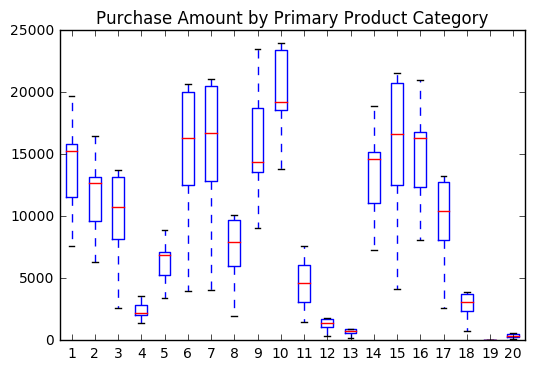

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt 
gb = df.groupby('Product_Category_1')
Purchase_groups = [gb.get_group(x)['Purchase'] for x in gb.groups]
plt.figure()
plt.boxplot(Purchase_groups,showfliers=False)
plt.title('Purchase Amount by Primary Product Category')

From the chart, the average and the dispersion for each group varies, which gives me confidence about the distribution of purchase amount differs in different product categories.

In [3]:
from scipy.stats import mstats

H, pval = mstats.kruskalwallis(Purchase_groups[0],Purchase_groups[1],Purchase_groups[2],Purchase_groups[3],
                              Purchase_groups[4],Purchase_groups[5],Purchase_groups[6],Purchase_groups[7],
                                Purchase_groups[8],Purchase_groups[9],Purchase_groups[10],Purchase_groups[11],
                               Purchase_groups[12],Purchase_groups[13],Purchase_groups[14],Purchase_groups[15],
                               Purchase_groups[16],Purchase_groups[17],Purchase_groups[18],Purchase_groups[19],
                              )

if pval < 0.05:
    print("pval = {:06.2f} Reject NULL hypothesis - Significant differences exist between groups.".format(pval))

KeyboardInterrupt: 

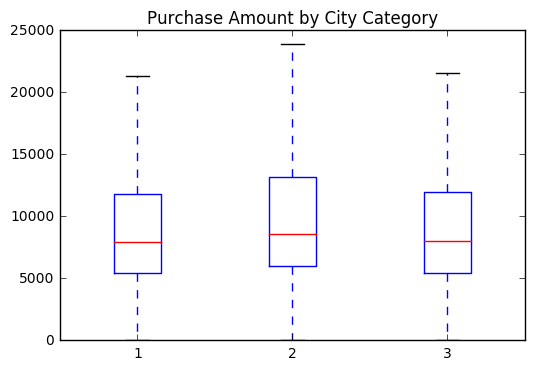

In [103]:
gb = df.groupby('City_Category')
City_groups = [gb.get_group(x)['Purchase'] for x in gb.groups]
plt.figure()
plt.boxplot(City_groups,showfliers=False)
plt.title('Purchase Amount by City Category')


In [37]:
H, pval = mstats.kruskalwallis(City_groups[0],City_groups[1],City_groups[2])
if pval < 0.05:
    print("pval = {:06.2f} Reject NULL hypothesis - Significant differences exist between groups.".format(pval))

pval = 000.00 Reject NULL hypothesis - Significant differences exist between groups.


Both categorical variables are significant. I will then transform and include them in the analysis. I will also do a training and CV set split.

In [104]:
#-- Handle NA values 
df['Product_Category_2'] = df['Product_Category_2'].fillna(value=999)
df['Product_Category_3'] = df['Product_Category_3'].fillna(value=999)

#-- Dummy Variables
col_dummy = ['City_Category','Product_Category_1','Product_Category_2','Product_Category_3']

for col_name in col_dummy:
    dummies = pd.get_dummies(df[col_name])
    new_cat = dummies.columns.tolist()
    new_cat_rename = [col_name + '_' + str(cat_name) for cat_name in new_cat]
    dummies.columns = new_cat_rename
    df = df.join(dummies)

#-- Interactive Variables
df['Gen_Marry'] = df.Gender * df.Marital_Status
X = df
X.drop('Purchase',axis=1)
y = df.Purchase



from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,Product_Category_3_11.0,Product_Category_3_12.0,Product_Category_3_13.0,Product_Category_3_14.0,Product_Category_3_15.0,Product_Category_3_16.0,Product_Category_3_17.0,Product_Category_3_18.0,Product_Category_3_999.0,Gen_Marry
0,1000001,P00069042,0,1,10,A,2,0,3,999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,1000001,P00087842,0,1,10,A,2,0,12,999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,1000002,P00285442,1,7,16,C,4,0,8,999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
5,1000003,P00193542,1,3,15,A,3,0,1,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
6,1000004,P00184942,1,5,7,B,2,1,1,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
7,1000004,P00346142,1,5,7,B,2,1,1,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
8,1000004,P0097242,1,5,7,B,2,1,1,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
9,1000005,P00274942,1,3,20,A,1,1,8,999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


## My First Regression Model 

Variables (n=5)= Gender, Age, Stay in Current City, Marital Status

No categorical variables

In [39]:
reg_1 = X_train.loc[:,[u'Gender', u'Age',u'Stay_In_Current_City_Years', u'Marital_Status']]
lm = smf.OLS(y_train,reg_1).fit()
print lm.summary()

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                 2.397e+05
Date:                Sun, 08 Oct 2017   Prob (F-statistic):               0.00
Time:                        21:53:57   Log-Likelihood:            -3.7005e+06
No. Observations:              368545   AIC:                         7.401e+06
Df Residuals:                  368541   BIC:                         7.401e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Gender              

In [40]:
#-- Predicting from Reg_1 Model
reg_1_test = X_test.loc[:,[u'Gender', u'Age',u'Stay_In_Current_City_Years', u'Marital_Status']]
y_predict = lm.predict(reg_1_test)

from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_predict))
print "RMSE of the testing sample is {:6.2f}".format(rms)

RMSE of the testing sample is 5537.35


It means that the predicted sample has smaller errors using model 2 than model 1. So even though model 1 has higher adjusted R, model 2 has the most important metrics improved. 

## Testing Interaction Effects between Marriage and Gender

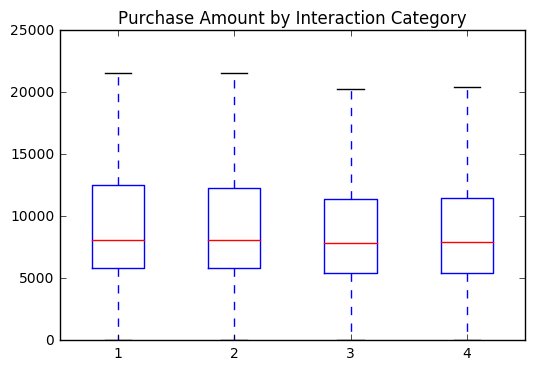

In [41]:
gb = df.groupby(['Gender','Marital_Status','Gen_Marry'])
Interaction_groups = [gb.get_group(x)['Purchase'] for x in gb.groups]
group_name = [x for x in gb.groups]
plt.figure()
plt.boxplot(Interaction_groups,showfliers=False)
plt.title('Purchase Amount by Interaction Category')

In [42]:
group_name

[(1L, 0L, 0L), (1L, 1L, 1L), (0L, 0L, 0L), (0L, 1L, 0L)]

In [45]:
##-- Explore Interactions Between Gender and Marriage Status ##
reg_int = df.loc[:,[u'Gender', u'Age', u'Marital_Status','Gen_Marry']]
lm = smf.OLS(df.Purchase,reg_int).fit()
print lm.summary()

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                 3.609e+05
Date:                Sun, 08 Oct 2017   Prob (F-statistic):               0.00
Time:                        21:54:35   Log-Likelihood:            -5.5215e+06
No. Observations:              550068   AIC:                         1.104e+07
Df Residuals:                  550064   BIC:                         1.104e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Gender          5343.0037     17.389    307.

All the variables are statistically is significant with p < 0.01. The coefficient of interaction is negative, meaning that men who are married will purchase significantly less than others. I will then add this factor to my second regression model"

## My Second Regression Model

In [69]:
reg_2 = X_train.loc[:,[u'Gender', u'Age', u'Marital_Status','Gen_Marry',u'Stay_In_Current_City_Years']]
lm = smf.OLS(X_train.Purchase,reg_2).fit()
print lm.summary()

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                 2.001e+05
Date:                Sun, 08 Oct 2017   Prob (F-statistic):               0.00
Time:                        22:17:30   Log-Likelihood:            -3.6948e+06
No. Observations:              368545   AIC:                         7.390e+06
Df Residuals:                  368540   BIC:                         7.390e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Gender              

In [70]:
#-- Predicting from Reg_2 Model
reg_2_test = X_test.loc[:,['Gender', u'Age', u'Marital_Status','Gen_Marry',u'Stay_In_Current_City_Years']]
y_predict = lm.predict(reg_2_test)

rms = sqrt(mean_squared_error(y_test, y_predict))
print "RMSE of the testing sample is {:6.2f}".format(rms)

RMSE of the testing sample is 5452.53


Adjusted R has improved by 0.01 and RMSE came down by 100 after modeling the interaction effects. I will look into adding more variable next

## My Third Regression Model

I want to expand my third model to City Category and Convert product category to dummy variables

In [122]:
reg_3 = X_train.loc[:,[u'Gender', u'Age',u'Stay_In_Current_City_Years', u'Marital_Status', 'Gen_Marry',u'City_Category_A', u'City_Category_B', u'City_Category_C',
                   u'Product_Category_1_1', u'Product_Category_1_2',u'Product_Category_1_3', u'Product_Category_1_4',
                   u'Product_Category_1_5', u'Product_Category_1_6',u'Product_Category_1_7', u'Product_Category_1_8',
                   u'Product_Category_1_9', u'Product_Category_1_10',u'Product_Category_1_11', u'Product_Category_1_12',
                   u'Product_Category_1_13', u'Product_Category_1_14',u'Product_Category_1_15', u'Product_Category_1_16',
                   u'Product_Category_1_17', u'Product_Category_1_18',u'Product_Category_1_19', u'Product_Category_1_20']]
lm = smf.OLS(X_train.Purchase,reg_3).fit()
print lm.summary()

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                 2.534e+04
Date:                Mon, 09 Oct 2017   Prob (F-statistic):               0.00
Time:                        01:55:08   Log-Likelihood:            -3.4748e+06
No. Observations:              368545   AIC:                         6.950e+06
Df Residuals:                  368518   BIC:                         6.950e+06
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Gender              

In [123]:
y_predict = lm.predict(reg_3)
rms = sqrt(mean_squared_error(y_train, y_predict))
print "RMSE of the trianing sample is {:6.2f}".format(rms)

RMSE of the trianing sample is 3009.16


In [124]:
#-- Predicting from Reg_2 Model
reg_2_test = X_test.loc[:,[u'Gender', u'Age',u'Stay_In_Current_City_Years', u'Marital_Status','Gen_Marry',
                           u'City_Category_A', u'City_Category_B', u'City_Category_C',
                   u'Product_Category_1_1', u'Product_Category_1_2',u'Product_Category_1_3', u'Product_Category_1_4',
                   u'Product_Category_1_5', u'Product_Category_1_6',u'Product_Category_1_7', u'Product_Category_1_8',
                   u'Product_Category_1_9', u'Product_Category_1_10',u'Product_Category_1_11', u'Product_Category_1_12',
                   u'Product_Category_1_13', u'Product_Category_1_14',u'Product_Category_1_15', u'Product_Category_1_16',
                   u'Product_Category_1_17', u'Product_Category_1_18',u'Product_Category_1_19', u'Product_Category_1_20']]
y_predict = lm.predict(reg_2_test)

rms = sqrt(mean_squared_error(y_test, y_predict))
print "RMSE of the testing sample is {:6.2f}".format(rms)

RMSE of the testing sample is 3030.18


Adk R has decreased while RMSE has gone down significantly by 2000. Difference between RMSE of testing and training sets are not significant. Based on that, I think my model still fits for a general purpose and not overfitting.

## Experimenting with Multicollinearity Issues

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def calculate_vif_(X, thresh=5.0):
    variables = range(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        vif = [variance_inflation_factor(X[variables].values, ix) for ix in range(X[variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[variables].columns[maxloc] + '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    
    return X.columns[variables]
    #return X[variables]


variables = calculate_vif_(reg_3)

dropping 'City_Category_A' at index: 5
dropping 'Product_Category_1_5' at index: 11
dropping 'Marital_Status' at index: 3
dropping 'Age' at index: 1
Remaining variables:
Index([                    u'Gender', u'Stay_In_Current_City_Years',
                        u'Gen_Marry',            u'City_Category_B',
                  u'City_Category_C',       u'Product_Category_1_1',
             u'Product_Category_1_2',       u'Product_Category_1_3',
             u'Product_Category_1_4',       u'Product_Category_1_6',
             u'Product_Category_1_7',       u'Product_Category_1_8',
             u'Product_Category_1_9',      u'Product_Category_1_10',
            u'Product_Category_1_11',      u'Product_Category_1_12',
            u'Product_Category_1_13',      u'Product_Category_1_14',
            u'Product_Category_1_15',      u'Product_Category_1_16',
            u'Product_Category_1_17',      u'Product_Category_1_18',
            u'Product_Category_1_19',      u'Product_Category_1_20'],
 

In [85]:
variables = variables.tolist()
reg_4 = X_train.loc[:,variables]
lm = smf.OLS(X_train.Purchase,reg_4).fit()
print lm.summary()

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                 1.230e+05
Date:                Sun, 08 Oct 2017   Prob (F-statistic):               0.00
Time:                        23:32:48   Log-Likelihood:            -3.5315e+06
No. Observations:              368545   AIC:                         7.063e+06
Df Residuals:                  368521   BIC:                         7.063e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Gender              

In [86]:
#-- Predicting from Reg_2 Model
reg_4_test = X_test.loc[:,variables]
y_predict = lm.predict(reg_4_test)

rms = sqrt(mean_squared_error(y_test, y_predict))
print "RMSE of the testing sample is {:6.2f}".format(rms)

RMSE of the testing sample is 3530.64


Adj R-Squared increased significantly to 0.889 but RMSE also increased. Since my goal is to maximize RMSE, so combining more variables, as long as it is not overfitting it's okay.

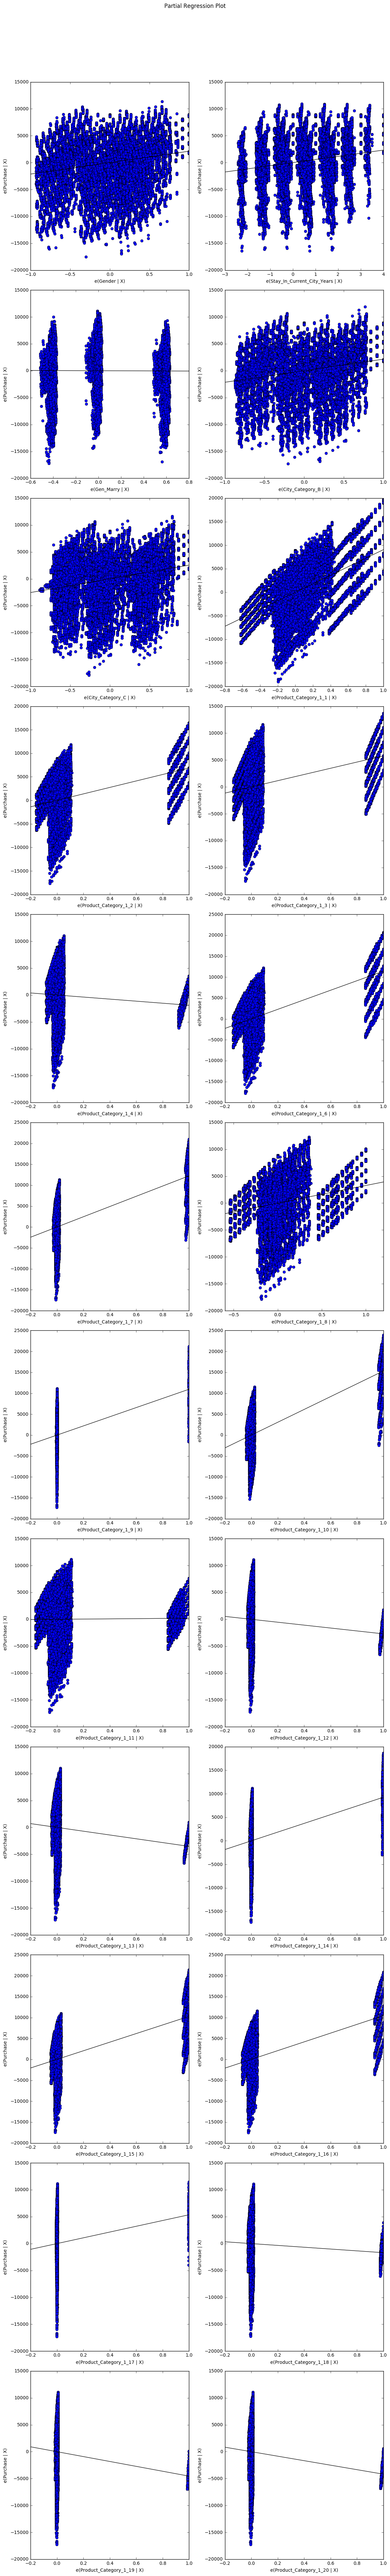

In [89]:
## Code for plotting residual plots for future reference
#-- Reference site: http://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html
import statsmodels.api as sm
fig = plt.figure(figsize=(12,80))
fig = sm.graphics.plot_partregress_grid(lm, fig=fig)

## Adding Additional Features

I have been thinking about adding other features provided in the dataset to reduce RMSE further. Now, I'm thinking about utilizing the product category 2 and 3

variables =[ u'Gender', u'Age',u'Stay_In_Current_City_Years', u'Marital_Status', 'Gen_Marry',u'City_Category_A', u'City_Category_B', u'City_Category_C',
                   u'Product_Category_1_1', u'Product_Category_1_2',u'Product_Category_1_3', u'Product_Category_1_4',
                   u'Product_Category_1_5', u'Product_Category_1_6',u'Product_Category_1_7', u'Product_Category_1_8',
                   u'Product_Category_1_9', u'Product_Category_1_10',u'Product_Category_1_11', u'Product_Category_1_12',
                   u'Product_Category_1_13', u'Product_Category_1_14',u'Product_Category_1_15', u'Product_Category_1_16',
                   u'Product_Category_1_17', u'Product_Category_1_18',u'Product_Category_1_19', u'Product_Category_1_20',
            u'Product_Category_2_2.0', u'Product_Category_2_3.0',
       u'Product_Category_2_4.0', u'Product_Category_2_5.0',
       u'Product_Category_2_6.0', u'Product_Category_2_7.0',
       u'Product_Category_2_8.0', u'Product_Category_2_9.0',
       u'Product_Category_2_10.0', u'Product_Category_2_11.0',
       u'Product_Category_2_12.0', u'Product_Category_2_13.0',
       u'Product_Category_2_14.0', u'Product_Category_2_15.0',
       u'Product_Category_2_16.0', u'Product_Category_2_17.0',
       u'Product_Category_2_18.0', u'Product_Category_3_3.0', u'Product_Category_3_4.0',
       u'Product_Category_3_5.0', u'Product_Category_3_6.0',
       u'Product_Category_3_8.0', u'Product_Category_3_9.0',
       u'Product_Category_3_10.0', u'Product_Category_3_11.0',
       u'Product_Category_3_12.0', u'Product_Category_3_13.0',
       u'Product_Category_3_14.0', u'Product_Category_3_15.0',
       u'Product_Category_3_16.0', u'Product_Category_3_17.0',
       u'Product_Category_3_18.0']
reg_5 = X_train.loc[:,variables]
lm = smf.OLS(X_train.Purchase,reg_5).fit()
print lm.summary()

In [118]:
#-- Predicting from Reg_2 Model
reg_5_test = X_test.loc[:,variables]
y_predict = lm.predict(reg_5_test)

rms = sqrt(mean_squared_error(y_test, y_predict))
print "RMSE of the testing sample is {:6.2f}".format(rms)

RMSE of the testing sample is 2997.24


RMSE has gone down further to another 40. But not really significantly better. I think the prominant presence of NA is the reason behind it. I don't think adding or deleting these two variables make a lot of differences. 

## Testing Set 

I will use Reg_4 model for my testing set

In [119]:
path = "P:/Coursera/BlackFriday/test.csv"
test_df = pd.read_csv(path)
test_df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [120]:
test_df.loc[:,'Gender'],co_index = pd.factorize(test_df['Gender'])
test_df.loc[:,'Stay_In_Current_City_Years']= test_df.loc[:,'Stay_In_Current_City_Years'].replace('4+',4)
test_df['Stay_In_Current_City_Years']= pd.to_numeric(test_df['Stay_In_Current_City_Years'])

age_cat = {'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7}
test_df.Age.replace(age_cat,inplace=True)

In [121]:
#-- Handle NA values 
test_df['Product_Category_2'] = test_df['Product_Category_2'].fillna(value=999)
test_df['Product_Category_3'] = test_df['Product_Category_3'].fillna(value=999)

#-- Dummy Variables
col_dummy = ['City_Category','Product_Category_1','Product_Category_2','Product_Category_3']

for col_name in col_dummy:
    dummies = pd.get_dummies(test_df[col_name])
    new_cat = dummies.columns.tolist()
    new_cat_rename = [col_name + '_' + str(cat_name) for cat_name in new_cat]
    dummies.columns = new_cat_rename
    test_df = test_df.join(dummies)

#-- Interactive Variables
test_df['Gen_Marry'] = test_df.Gender * test_df.Marital_Status
X = test_df

test_df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,Product_Category_3_11.0,Product_Category_3_12.0,Product_Category_3_13.0,Product_Category_3_14.0,Product_Category_3_15.0,Product_Category_3_16.0,Product_Category_3_17.0,Product_Category_3_18.0,Product_Category_3_999.0,Gen_Marry
0,1000004,P00128942,0,5,7,B,2,1,1,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,1000009,P00113442,0,3,17,C,0,0,3,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,1000010,P00288442,1,4,1,B,4,1,5,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,1000010,P00145342,1,4,1,B,4,1,4,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,1000011,P00053842,1,3,1,C,1,0,4,5.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,1000013,P00350442,0,5,1,C,3,1,2,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
6,1000013,P00155442,0,5,1,C,3,1,1,11.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
7,1000013,P0094542,0,5,1,C,3,1,2,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,1000015,P00161842,0,3,7,A,1,0,10,13.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
9,1000022,P00067942,0,2,15,A,4,0,5,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [130]:
X_test = X.loc[:,[u'Gender', u'Age',u'Stay_In_Current_City_Years', u'Marital_Status','Gen_Marry',
                           u'City_Category_A', u'City_Category_B', u'City_Category_C',
                   u'Product_Category_1_1', u'Product_Category_1_2',u'Product_Category_1_3', u'Product_Category_1_4',
                   u'Product_Category_1_5', u'Product_Category_1_6',u'Product_Category_1_7', u'Product_Category_1_8',
                   u'Product_Category_1_9', u'Product_Category_1_10',u'Product_Category_1_11', u'Product_Category_1_12',
                   u'Product_Category_1_13', u'Product_Category_1_14',u'Product_Category_1_15', u'Product_Category_1_16',
                   u'Product_Category_1_17', u'Product_Category_1_18',u'Product_Category_1_19', u'Product_Category_1_20']]
X_test = X_test.fillna(value=0)
y_predict = lm.predict(X_test)

In [131]:
y_predict

array([ 13686.16471759,  10392.62575299,   6158.93124788, ...,
        13435.61360114,  20209.57223975,   2353.24709935])

In [134]:
output = X.loc[:,['User_ID','Product_ID']]
output['Purchase'] = y_predict
output.to_csv('Output_blackfriday.csv', index=False)